# Лабораторная 4. Пространственная фильтрация

Выполнить улучшение изображения по описанию (Гонсалес п.3.8 или 3.7 (зависит от года издания), кратко в презентации)

In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Функция вывода изображения

In [2]:
def showImage(imageArray, size=(20,20)):
    plt.figure(figsize=size)
    plt.imshow(imageArray, interpolation='nearest')
    plt.show()

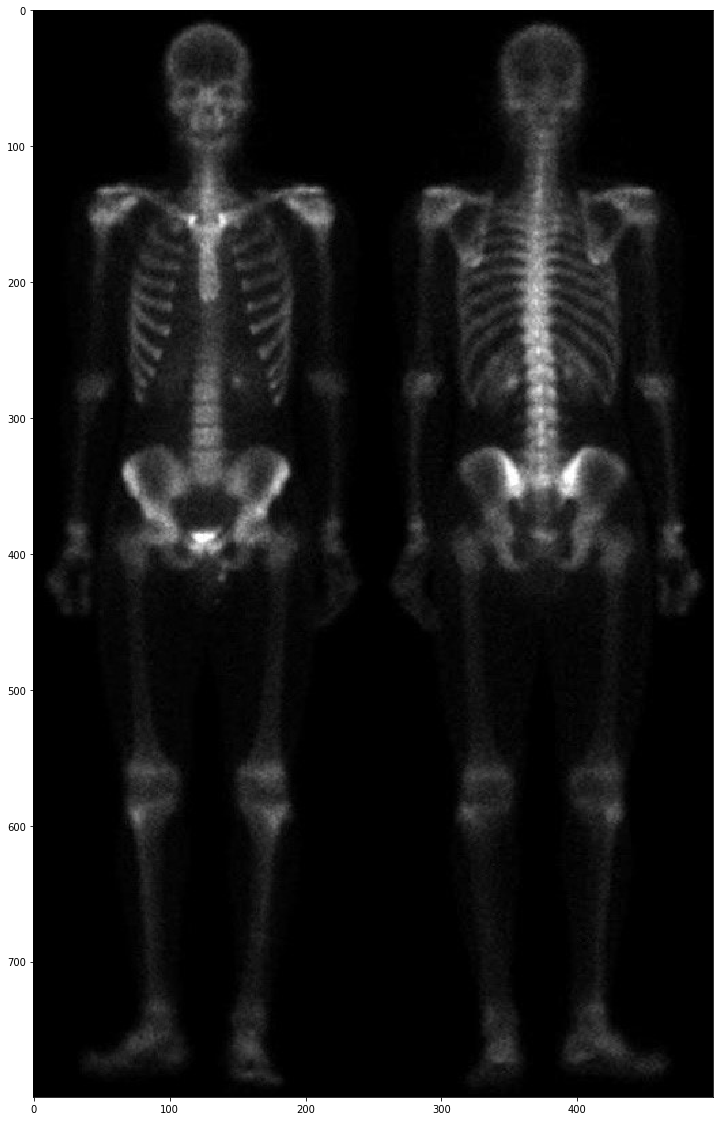

In [3]:
imageSrs = cv2.imread("1.jpg")

showImage(imageSrs)

# Преобразование функцией imadjust

In [4]:
 # Настройка изображения
def imadjust(imgTable, In=(0,1.0), Out=(0,1.0), gamma=1.0):
    "J = low_out +(high_out - low_out).* ((I - low_in)/(high_in - low_in)).^ gamma"
    low_in, high_in = In
    low_out, high_out = Out
 
    low_in *= 255.0
    high_in *= 255.0
 
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (high_in - low_in)
         # Таблица преобразования гаммы
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    h,w = imgTable.shape[:2]
    imgOut = np.zeros((h,w), np.uint8)
    
    for r in range(h):
        for c in range(w):
            if imgTable[r,c] <= low_in:
                imgOut[r,c] = low_out                
            elif imgTable[r,c] > high_in:
                imgOut[r,c] = high_out
            else:
                res = int(k*(imgTable[r,c]-low_in) + low_out)
                imgOut [r, c] = table [res] # Проверить таблицу
               
    return imgOut

def convertNDArrayToTable(image):
    height, width = image.shape[:2]
    table = np.zeros((height, width), np.uint8)
    for i in range(height):
        for j in range(width):
            table[i, j] = image[i,j][0]
    return table

def convertTableToNDArray(table):
    height, width = table.shape[:2]
    image = np.ndarray((height, width,3), np.uint8)
    color = 0
    for i in range(height):
        for j in range(width):
            color = table[i, j]
            image[i, j] = (color, color, color)
    return image

#gamma = imadjust(img,(0,1), (1,0))
def transformCircle(image, low_in, high_in, low_out, high_out, gamma):
    table = convertNDArrayToTable(image)
    gammaImage = imadjust(table,(low_in, high_in), (low_out, high_out), gamma)
    image = convertTableToNDArray(gammaImage)
    image = cv2.bitwise_not(image)
    showImage(image)

interact(transformCircle, image=fixed(imageSrs), low_in=(0, 1, 0.1), high_in=(0, 1, 0.1), low_out=(0, 1, 0.1), high_out=(0, 1, 0.1), gamma=((1, 10)))

interactive(children=(FloatSlider(value=0.0, description='low_in', max=1.0), FloatSlider(value=0.0, descriptio…

<function __main__.transformCircle(image, low_in, high_in, low_out, high_out, gamma)>